In [1]:
import pandas as pd
#pd.set_option('display.max_rows', None)
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import numpy as np
import netCDF4 as nc
np.set_printoptions(threshold=100000)
from shapely.geometry import Polygon, Point, MultiPoint
from shapely.ops import cascaded_union
from datetime import datetime, timedelta
import time
import warnings
import statsmodels.api as sm
import datetime

warnings.filterwarnings('ignore')

from my_functions import sat_vap_press, vap_press, hot_dry_windy, haines

(3601,) (7201,)
(3600,) (7200,)
[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]


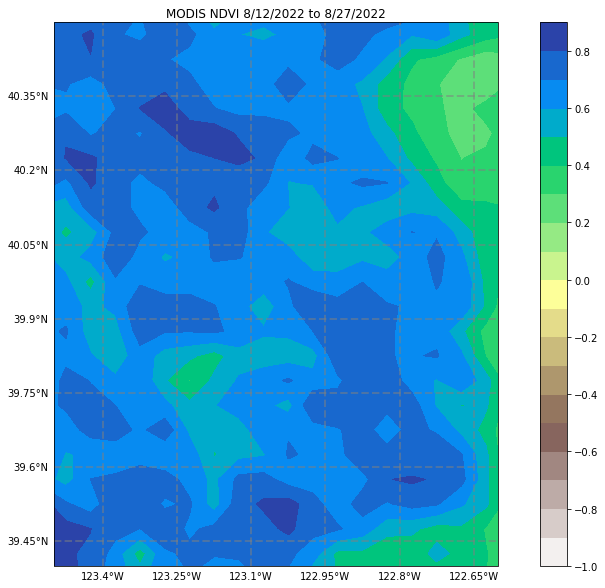

In [37]:
dat = nc.Dataset('../2020/NDVI/MOD13C1.A2020225.006.2020242045826.hdf')
ndvi = dat['CMG 0.05 Deg 16 days NDVI'][:]
ndvi_flipped = np.flipud(ndvi)
#print(ndvi_flipped.shape)
#print(ndvi)

lat_corners = np.arange(-90, 90.05, 0.05)
lon_corners = np.arange(-180, 180.05, 0.05)
print(lat_corners.shape, lon_corners.shape)

lat_centers = (lat_corners[0:len(lat_corners)-1] + lat_corners[1:len(lat_corners)])/2
lon_centers = (lon_corners[0:len(lon_corners)-1] + lon_corners[1:len(lon_corners)])/2
print(lat_centers.shape, lon_centers.shape)
LON_CORNER, LAT_CORNER = np.meshgrid(lon_corners, lat_corners)
LON_CENTER, LAT_CENTER = np.meshgrid(lon_centers, lat_centers)

lat_inds = np.where((lat_centers>=31)& (lat_centers<=51))[0]
lat_start = lat_inds[0]
lat_end = lat_inds[len(lat_inds)-1]
lon_inds = np.where((lon_centers>=-126)& (lon_centers<=-101))[0]
lon_start = lon_inds[0]
lon_end = lon_inds[len(lon_inds)-1]


fig = plt.figure(figsize=(15,10))
ax= fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines()
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-123.5, -122.6, 39.4, 40.5])

ax.coastlines()
ax.add_feature(cfeature.STATES, linestyle='-', alpha=.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
#CS = plt.contourf(X, Y, Z, levels=levels, cmap=cm.coolwarm, extend='min')

levels = np.arange(-1,1,0.1) #need to specify levels for the contours#
print(levels)
    
fuelmap = plt.contourf(LON_CENTER[lat_start:lat_end, lon_start:lon_end],\
            LAT_CENTER[lat_start:lat_end, lon_start:lon_end],\
           ndvi_flipped[lat_start:lat_end, lon_start:lon_end]/1e8,\
            levels=levels,cmap='terrain_r')

#plt.scatter(-96.775367, 43.487384,marker='*', c = 'y', s =500)
colorbar = plt.colorbar(fuelmap)

#fuel_labels = ['water', 'evergreen needleleaf forest', 'evergreen broadleaf forest', 'deciduous needleleaf forest', \
#               'deciduous broadleaf forest', 'mixed forests', 'closed shrubland', 'open shrublands', 'woody savannas',\
#               'savannas', 'grasslands', 'permanent wetlands', 'croplands', 'urban and built-up',\
#               'cropland/natural vegetation mosaic', 'snow and ice ', 'barren or sparsely vegetated']
#colorbar.set_ticklabels(ticklabels = fuel_labels)
plt.title('MODIS NDVI 8/12/2022 to 8/27/2022')
plt.show()

(3601,) (7201,)
(3600,) (7200,)
[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]


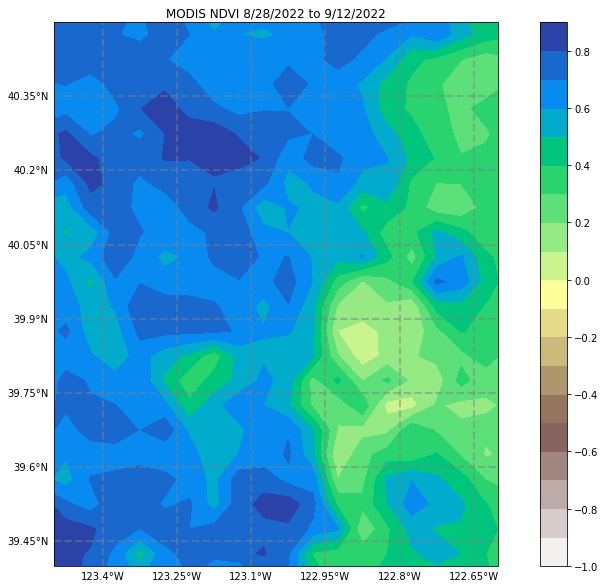

In [40]:
dat = nc.Dataset('../2020/NDVI/MOD13C1.A2020241.006.2020262032805.hdf')
ndvi = dat['CMG 0.05 Deg 16 days NDVI'][:]
ndvi_flipped = np.flipud(ndvi)
#print(ndvi_flipped.shape)
#print(ndvi)

lat_corners = np.arange(-90, 90.05, 0.05)
lon_corners = np.arange(-180, 180.05, 0.05)
print(lat_corners.shape, lon_corners.shape)

lat_centers = (lat_corners[0:len(lat_corners)-1] + lat_corners[1:len(lat_corners)])/2
lon_centers = (lon_corners[0:len(lon_corners)-1] + lon_corners[1:len(lon_corners)])/2
print(lat_centers.shape, lon_centers.shape)
LON_CORNER, LAT_CORNER = np.meshgrid(lon_corners, lat_corners)
LON_CENTER, LAT_CENTER = np.meshgrid(lon_centers, lat_centers)

lat_inds = np.where((lat_centers>=31)& (lat_centers<=51))[0]
lat_start = lat_inds[0]
lat_end = lat_inds[len(lat_inds)-1]
lon_inds = np.where((lon_centers>=-126)& (lon_centers<=-101))[0]
lon_start = lon_inds[0]
lon_end = lon_inds[len(lon_inds)-1]


fig = plt.figure(figsize=(15,10))
ax= fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines()
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-123.5, -122.6, 39.4, 40.5])
ax.coastlines()
ax.add_feature(cfeature.STATES, linestyle='-', alpha=.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
#CS = plt.contourf(X, Y, Z, levels=levels, cmap=cm.coolwarm, extend='min')

levels = np.arange(-1,1,0.1) #need to specify levels for the contours#
print(levels)
    
fuelmap = plt.contourf(LON_CENTER[lat_start:lat_end, lon_start:lon_end],\
            LAT_CENTER[lat_start:lat_end, lon_start:lon_end],\
           ndvi_flipped[lat_start:lat_end, lon_start:lon_end]/1e8,\
            levels=levels,cmap='terrain_r')

#plt.scatter(-96.775367, 43.487384,marker='*', c = 'y', s =500)
colorbar = plt.colorbar(fuelmap)

#fuel_labels = ['water', 'evergreen needleleaf forest', 'evergreen broadleaf forest', 'deciduous needleleaf forest', \
#               'deciduous broadleaf forest', 'mixed forests', 'closed shrubland', 'open shrublands', 'woody savannas',\
#               'savannas', 'grasslands', 'permanent wetlands', 'croplands', 'urban and built-up',\
#               'cropland/natural vegetation mosaic', 'snow and ice ', 'barren or sparsely vegetated']
#colorbar.set_ticklabels(ticklabels = fuel_labels)
plt.title('MODIS NDVI 8/28/2022 to 9/12/2022')
plt.show()

(3601,) (7201,)
(3600,) (7200,)
[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]


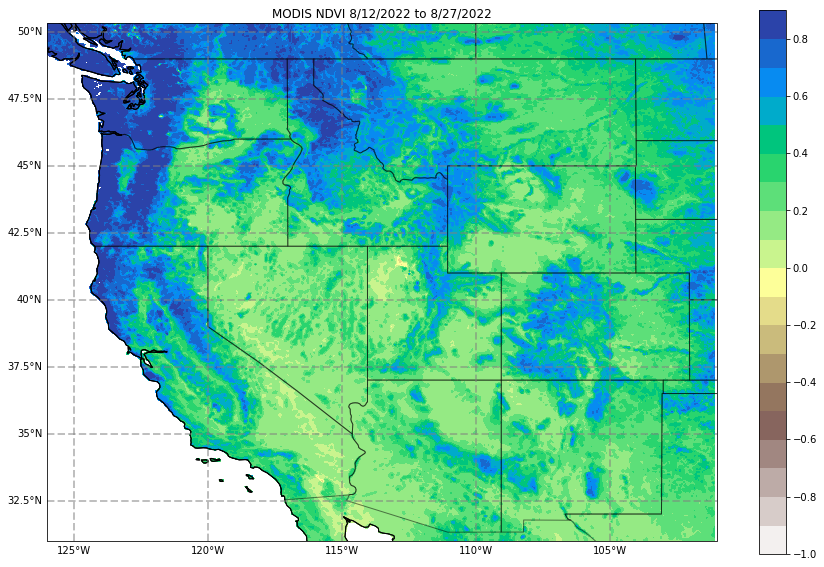